In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
myplayers = pd.read_csv("all_players.csv")

This dataset is partially incomplete, missing values in the 'Club' columns and 'SOG%'.

After looking into this issue, seems like there are no 'Club' records during the post-season. So we'll focus our efforts on the regular season.

As for the missing entries in 'SOG%' they are just the result of diving the shots on target('SOG') under the total shots attempted ('SHTS') so we can manually add these values to complete this column.

Encounter some issues when attempt to divide by zeros, Locate these special cases to be able to handle the rest:

In [3]:
myplayers.dtypes

Player      object
Club        object
POS         object
GP           int64
GS           int64
MINS         int64
G            int64
A            int64
SHTS         int64
SOG          int64
GWG          int64
PKG/A       object
HmG          int64
RdG          int64
G/90min    float64
SC%        float64
GWA          int64
HmA          int64
RdA          int64
A/90min    float64
FC           int64
FS           int64
OFF          int64
YC           int64
RC           int64
SOG%       float64
Year         int64
Season      object
dtype: object

In [4]:
myplayers['POS'] = myplayers['POS'].replace(['M-D', 'D-M'], 'MD')
myplayers['POS'] = myplayers['POS'].replace(['M-F', 'F-M'], 'MO')

In [5]:
# Set 'SOG%' to 0.0 where both 'SHTS' and 'SOG' are zero
myplayers.loc[(myplayers['SHTS'] == 0) & (myplayers['SOG'] == 0), 'SOG%'] = 0.0

# Confirm that there are no more missing values in the dataset
final_missing_values_confirmation = myplayers.isnull().sum()
final_missing_values_confirmation


Player        0
Club       5493
POS           0
GP            0
GS            0
MINS          0
G             0
A             0
SHTS          0
SOG           0
GWG           0
PKG/A         0
HmG           0
RdG           0
G/90min       0
SC%           0
GWA           0
HmA           0
RdA           0
A/90min       0
FC            0
FS            0
OFF           0
YC            0
RC            0
SOG%          0
Year          0
Season        0
dtype: int64

In [6]:
myplayers_reg = myplayers[myplayers['Season'] == 'reg']
myplayers_reg.head(-5)

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,...,2,0.14,20,39,70,2,0,64.47,1996,reg
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,...,2,0.08,32,26,35,6,1,49.00,1996,reg
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,...,3,0.27,48,26,25,5,0,64.37,1996,reg
3,Preki,KC,M,32,32,2880,18,13,140,61,...,4,0.41,26,44,7,3,0,43.57,1996,reg
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,...,1,0.12,21,46,10,0,0,55.70,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15291,Marcelo Silva,RSL,D,15,15,1309,0,0,12,4,...,0,0.00,19,3,0,4,0,33.33,2020,reg
15292,Boniek Garcia,HOU,M,18,7,819,0,0,12,1,...,0,0.00,12,9,0,5,0,8.33,2020,reg
15293,Nedum Onuoha,RSL,D,15,15,1318,0,0,12,2,...,0,0.00,7,9,2,0,0,16.67,2020,reg
15294,Sacha Kljestan,LA,M,15,8,769,0,0,13,4,...,0,0.00,12,5,0,2,0,30.77,2020,reg


In [7]:
final_missing_values_confirmation = myplayers_reg.isnull().sum()
final_missing_values_confirmation

Player     0
Club       0
POS        0
GP         0
GS         0
MINS       0
G          0
A          0
SHTS       0
SOG        0
GWG        0
PKG/A      0
HmG        0
RdG        0
G/90min    0
SC%        0
GWA        0
HmA        0
RdA        0
A/90min    0
FC         0
FS         0
OFF        0
YC         0
RC         0
SOG%       0
Year       0
Season     0
dtype: int64

Now that we've got our dataset cleaned up. We can start doing some analysis. 

## Visualizing the data ##

First, let's take a look at some graphs, visualizing the data might be helpful to find insights.

In [8]:
myplayers.columns.tolist()

['Player',
 'Club',
 'POS',
 'GP',
 'GS',
 'MINS',
 'G',
 'A',
 'SHTS',
 'SOG',
 'GWG',
 'PKG/A',
 'HmG',
 'RdG',
 'G/90min',
 'SC%',
 'GWA',
 'HmA',
 'RdA',
 'A/90min',
 'FC',
 'FS',
 'OFF',
 'YC',
 'RC',
 'SOG%',
 'Year',
 'Season']

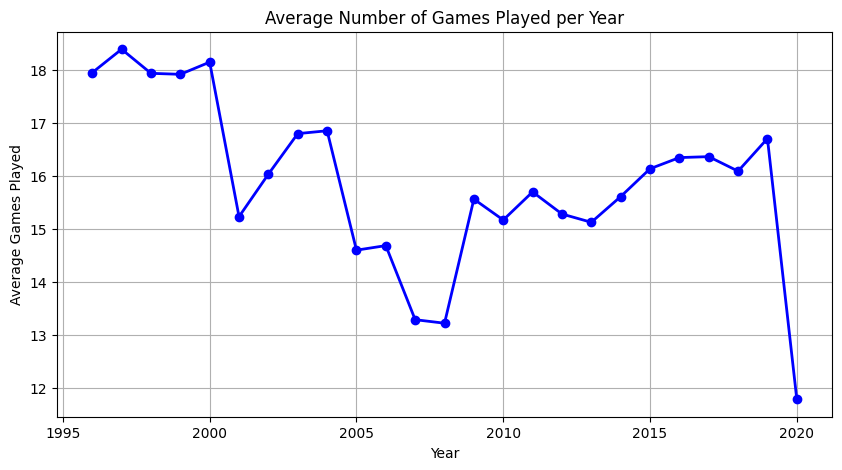

In [9]:
avg_games = myplayers_reg.groupby('Year')['GP'].mean()

plt.figure(figsize=(10, 5))
avg_games.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Average Number of Games Played per Year')
plt.xlabel('Year')
plt.ylabel('Average Games Played')
plt.grid(True)
plt.show()

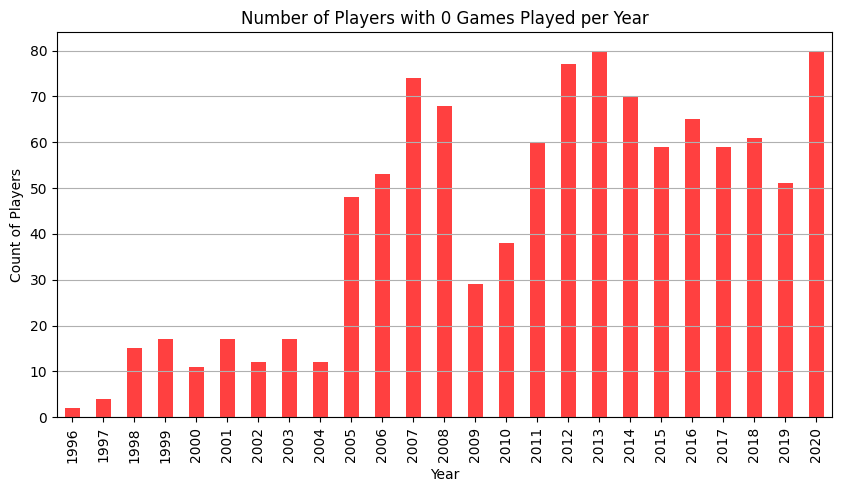

In [10]:
# Filter data for players with 0 games played
zero_games = myplayers_reg[myplayers_reg['GP'] == 0]
# Count the number of such players per year
count_zero_games = zero_games.groupby('Year').size()

plt.figure(figsize=(10, 5))
count_zero_games.plot(kind='bar', color='r', alpha=0.75)
plt.title('Number of Players with 0 Games Played per Year')
plt.xlabel('Year')
plt.ylabel('Count of Players')
plt.grid(True, axis='y')
plt.show()

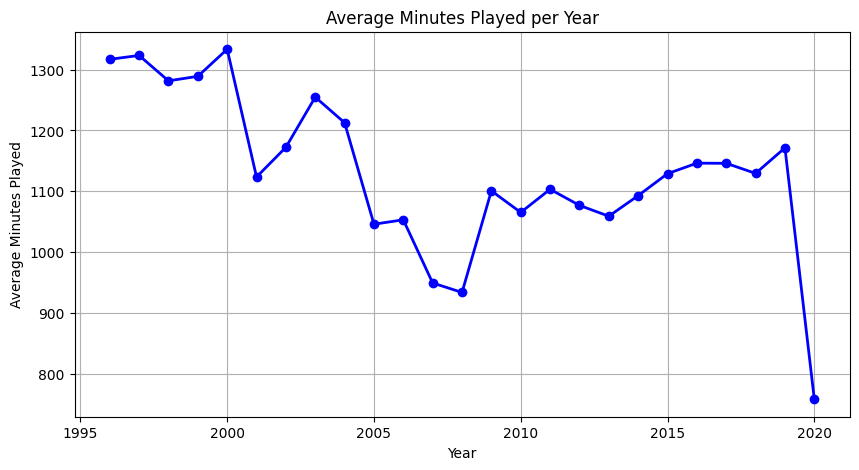

In [11]:
avg_minutes = myplayers_reg.groupby('Year')['MINS'].mean()

plt.figure(figsize=(10, 5))
avg_minutes.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Average Minutes Played per Year')
plt.xlabel('Year')
plt.ylabel('Average Minutes Played')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

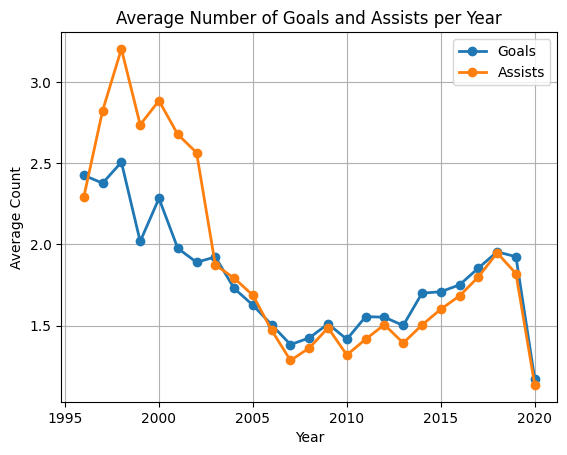

In [12]:
avg_goals_assists = myplayers_reg.groupby('Year')[['G', 'A']].mean()
    
plt.figure(figsize=(12, 6))
avg_goals_assists.plot(kind='line', marker='o', linewidth=2)
plt.title('Average Number of Goals and Assists per Year')
plt.xlabel('Year')
plt.ylabel('Average Count')
plt.legend(['Goals', 'Assists'])
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

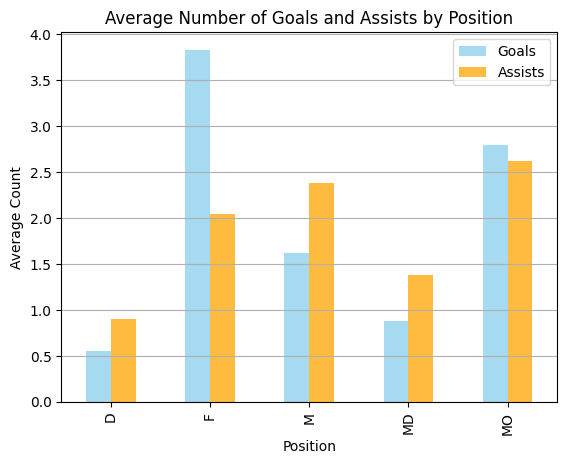

In [50]:
avg_goals_assists_pos = myplayers_reg.groupby('POS')[['G', 'A']].mean()
    
plt.figure(figsize=(12, 6))
avg_goals_assists_pos.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.75)
plt.title('Average Number of Goals and Assists by Position')
plt.xlabel('Position')
plt.ylabel('Average Count')
plt.legend(['Goals', 'Assists'])
plt.grid(True, axis='y')
plt.show()

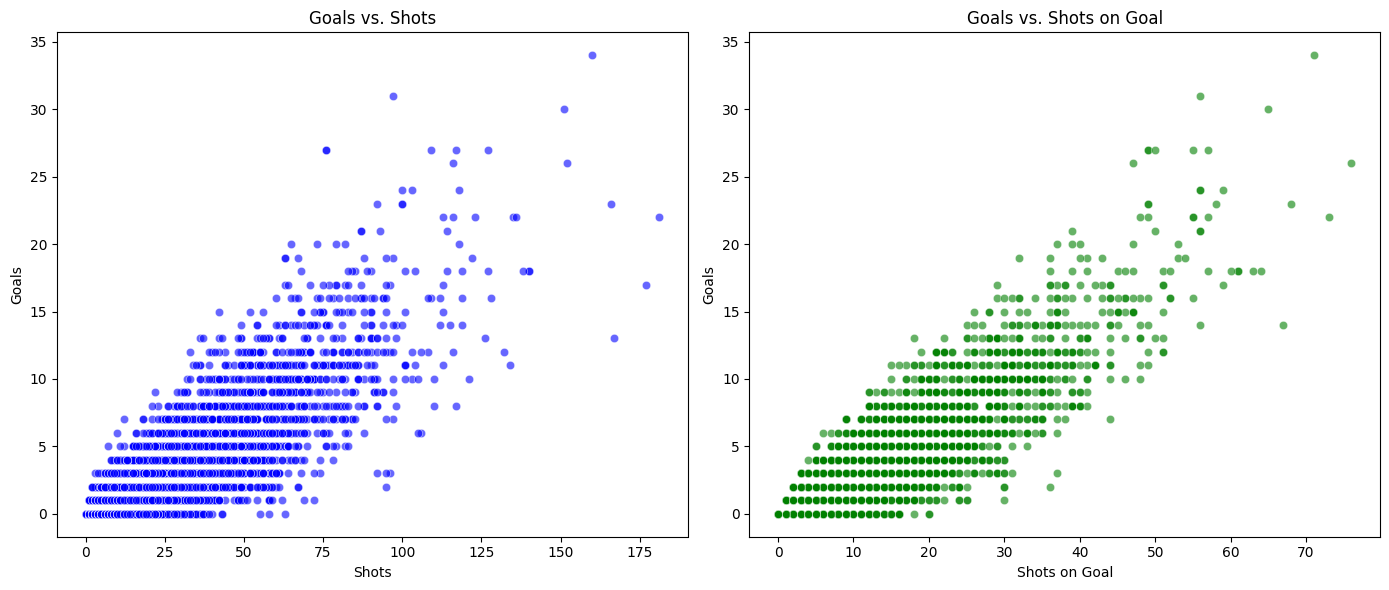

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
# Goals vs Shots
sns.scatterplot(ax=ax[0], data=myplayers_reg, x='SHTS', y='G', color='blue', alpha=0.6)
ax[0].set_title('Goals vs. Shots')
ax[0].set_xlabel('Shots')
ax[0].set_ylabel('Goals')
    
# Goals vs Shots on Goal
sns.scatterplot(ax=ax[1], data=myplayers_reg, x='SOG', y='G', color='green', alpha=0.6)
ax[1].set_title('Goals vs. Shots on Goal')
ax[1].set_xlabel('Shots on Goal')
ax[1].set_ylabel('Goals')
    
plt.tight_layout()
plt.show()

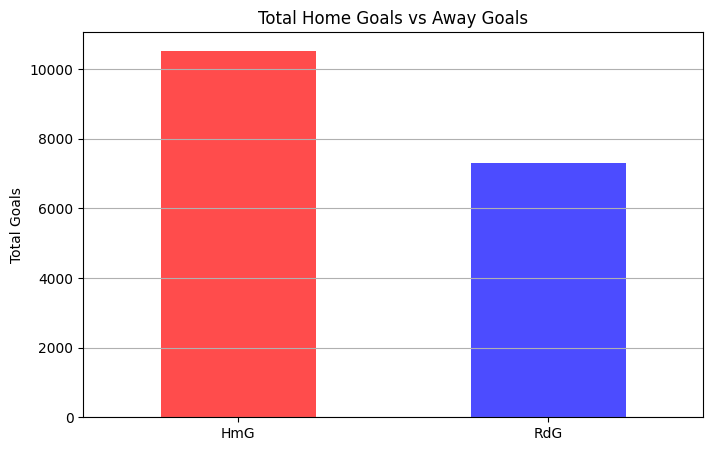

In [14]:
home_away_goals = myplayers_reg[['HmG', 'RdG']].sum()
    
plt.figure(figsize=(8, 5))
home_away_goals.plot(kind='bar', color=['red', 'blue'], alpha=0.7)
plt.title('Total Home Goals vs Away Goals')
plt.ylabel('Total Goals')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

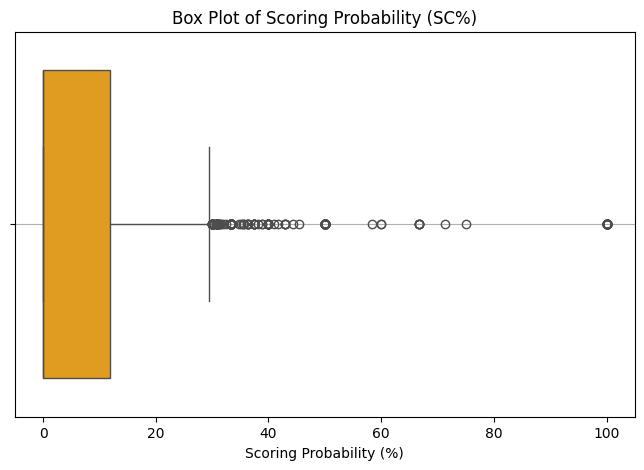

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=myplayers_reg['SC%'], color='orange')
plt.title('Box Plot of Scoring Probability (SC%)')
plt.xlabel('Scoring Probability (%)')
plt.grid(True, axis='y')
plt.show()

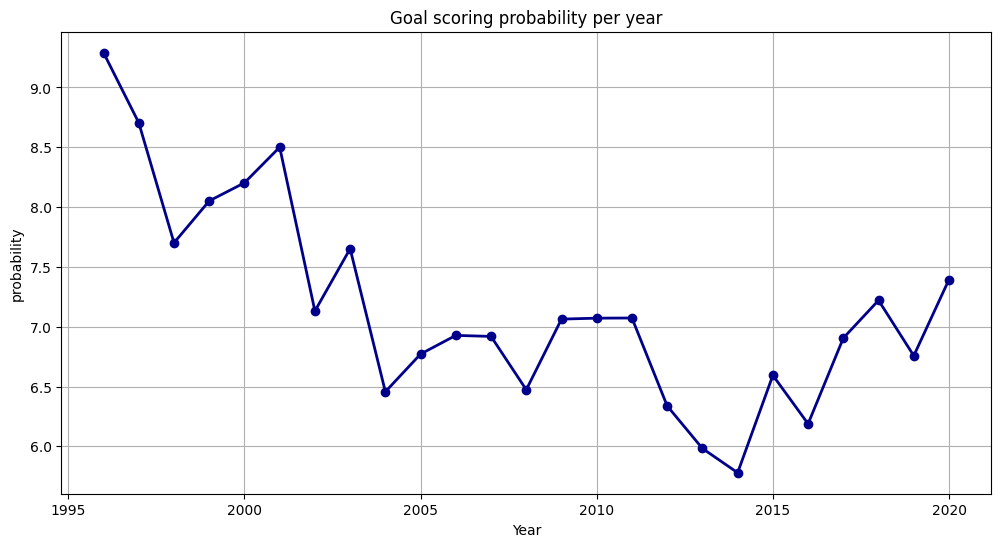

In [16]:
goal_prob_peryear = myplayers_reg.groupby('Year')['SC%'].mean()
    
plt.figure(figsize=(12, 6))
goal_prob_peryear.plot(kind='line', marker='o', color='darkblue', linewidth=2)
plt.title('Goal scoring probability per year')
plt.xlabel('Year')
plt.ylabel('probability')
plt.grid(True)
plt.show()

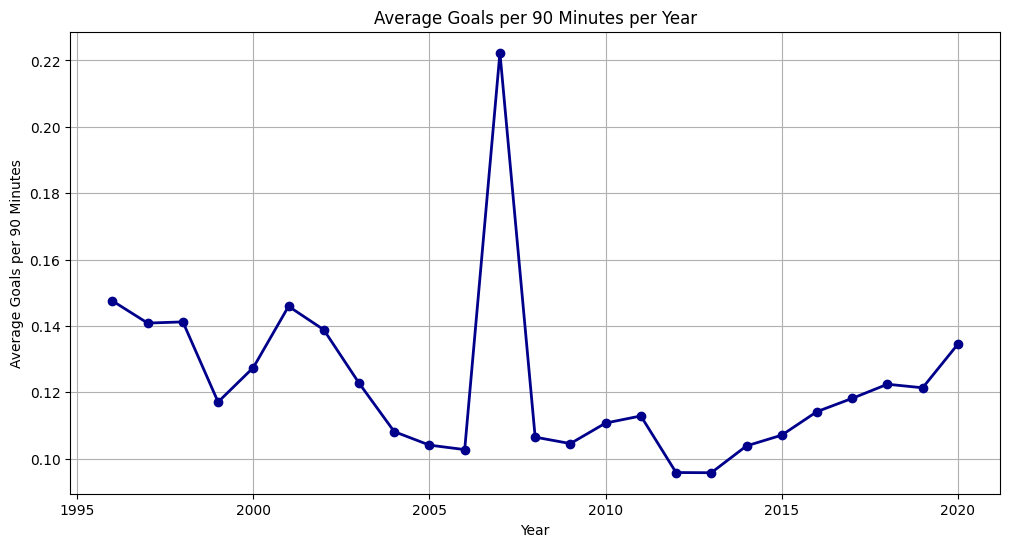

In [17]:
avg_goals_per_90min = myplayers_reg.groupby('Year')['G/90min'].mean()
    
plt.figure(figsize=(12, 6))
avg_goals_per_90min.plot(kind='line', marker='o', color='darkblue', linewidth=2)
plt.title('Average Goals per 90 Minutes per Year')
plt.xlabel('Year')
plt.ylabel('Average Goals per 90 Minutes')
plt.grid(True)
plt.show()

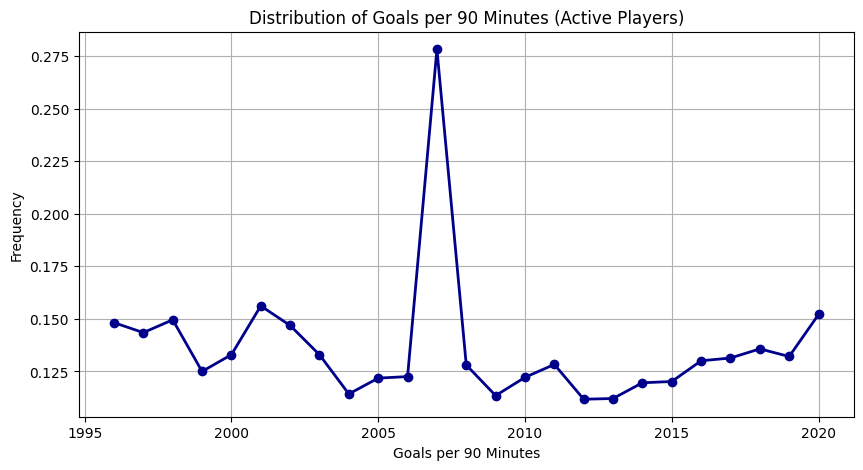

In [18]:
active_players_reg = myplayers_reg[myplayers_reg['GP'] > 0].groupby('Year')['G/90min'].mean()

plt.figure(figsize=(10, 5))
active_players_reg.plot(kind='line', marker='o', color='darkblue', linewidth=2)
plt.title('Distribution of Goals per 90 Minutes (Active Players)')
plt.xlabel('Goals per 90 Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Looks like 2007 was a hell of year with lots of action and goals scored

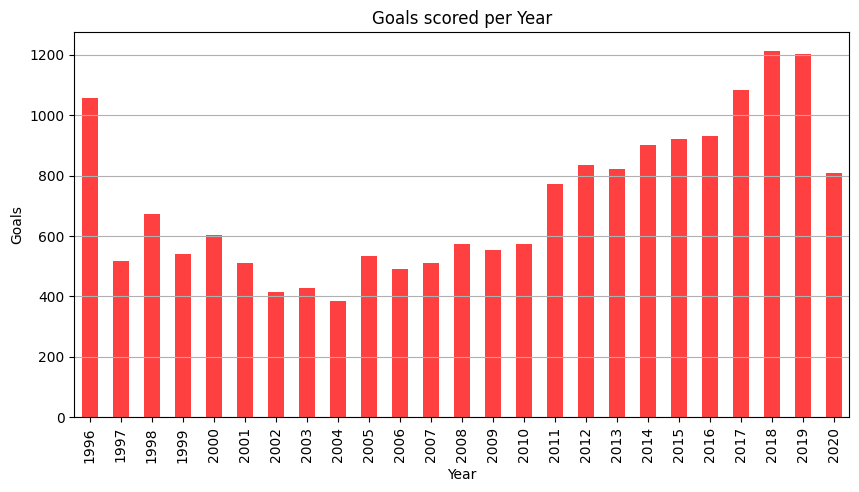

In [19]:
goals_peryear = myplayers_reg.groupby('Year')['G'].sum()

plt.figure(figsize=(10, 5))
goals_peryear.plot(kind='bar', color='r', alpha=0.75)
plt.title('Goals scored per Year')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.grid(True, axis='y')
plt.show()

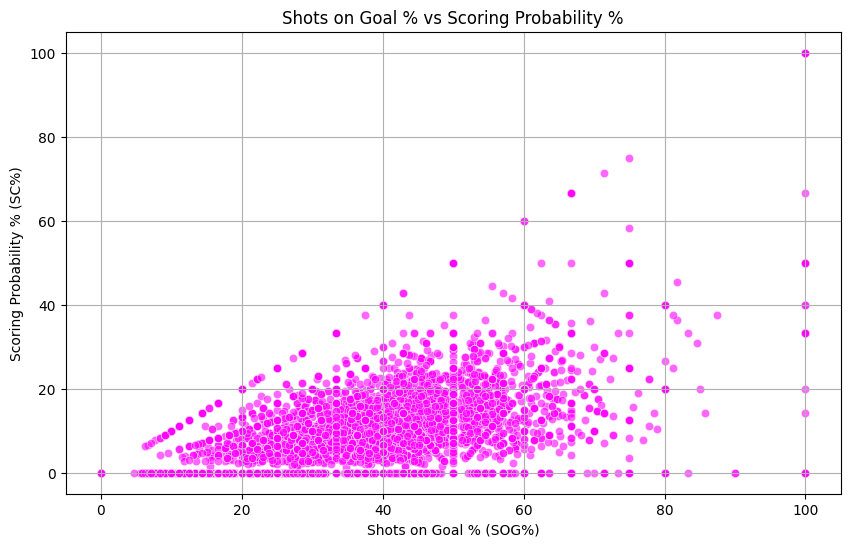

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=myplayers_reg, x='SOG%', y='SC%', color='magenta', alpha=0.6)
plt.title('Shots on Goal % vs Scoring Probability %')
plt.xlabel('Shots on Goal % (SOG%)')
plt.ylabel('Scoring Probability % (SC%)')
plt.grid(True)
plt.show()

In [24]:
correlation = myplayers_reg[['SOG%', 'SC%']].corr().iloc[0, 1]
correlation

0.5231651583691657

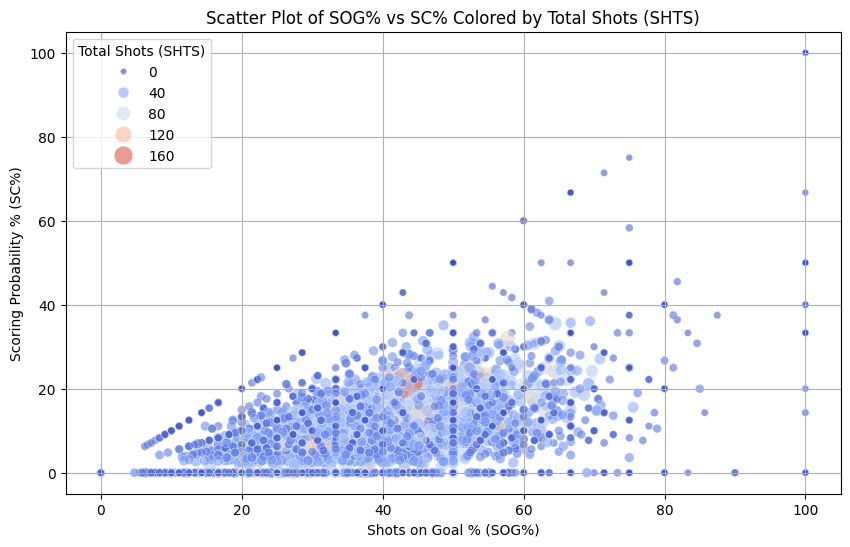

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=myplayers_reg, x='SOG%', y='SC%', size='SHTS', sizes=(20, 200), alpha=0.6, hue='SHTS', palette='coolwarm')
plt.title('Scatter Plot of SOG% vs SC% Colored by Total Shots (SHTS)')
plt.xlabel('Shots on Goal % (SOG%)')
plt.ylabel('Scoring Probability % (SC%)')
plt.legend(title='Total Shots (SHTS)')
plt.grid(True)
plt.show()

In [26]:
correlation = myplayers_reg[['SHTS', 'SOG%', 'SC%']].corr()
correlation

,SHTS,SOG%,SC%
SHTS,1.000000,0.342355,0.270844
SOG%,0.342355,1.000000,0.523165
SC%,0.270844,0.523165,1.000000


<Figure size 1200x600 with 0 Axes>

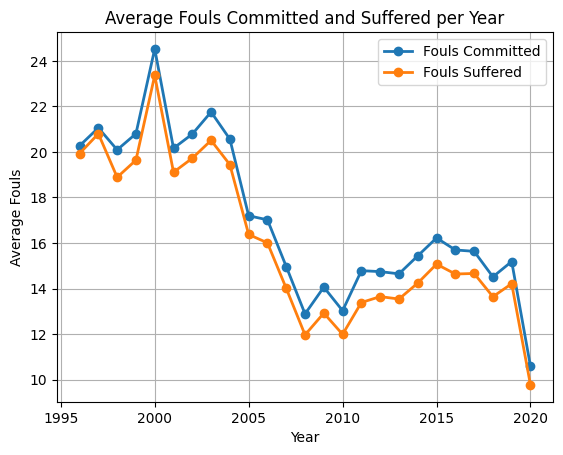

In [27]:
avg_fouls = myplayers_reg.groupby('Year')[['FC', 'FS']].mean()
    
plt.figure(figsize=(12, 6))
avg_fouls.plot(kind='line', marker='o', linewidth=2)
plt.title('Average Fouls Committed and Suffered per Year')
plt.xlabel('Year')
plt.ylabel('Average Fouls')
plt.legend(['Fouls Committed', 'Fouls Suffered'])
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

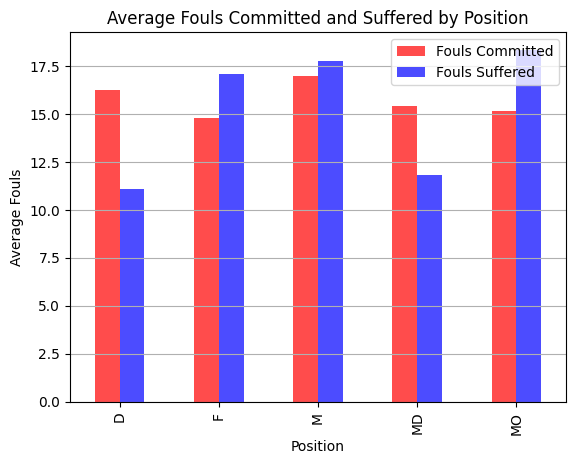

In [28]:
avg_fouls_pos = myplayers_reg.groupby('POS')[['FC', 'FS']].mean()
    
plt.figure(figsize=(12, 6))
avg_fouls_pos.plot(kind='bar', color=['red', 'blue'], alpha=0.7)
plt.title('Average Fouls Committed and Suffered by Position')
plt.xlabel('Position')
plt.ylabel('Average Fouls')
plt.legend(['Fouls Committed', 'Fouls Suffered'])
plt.grid(True, axis='y')
plt.show()

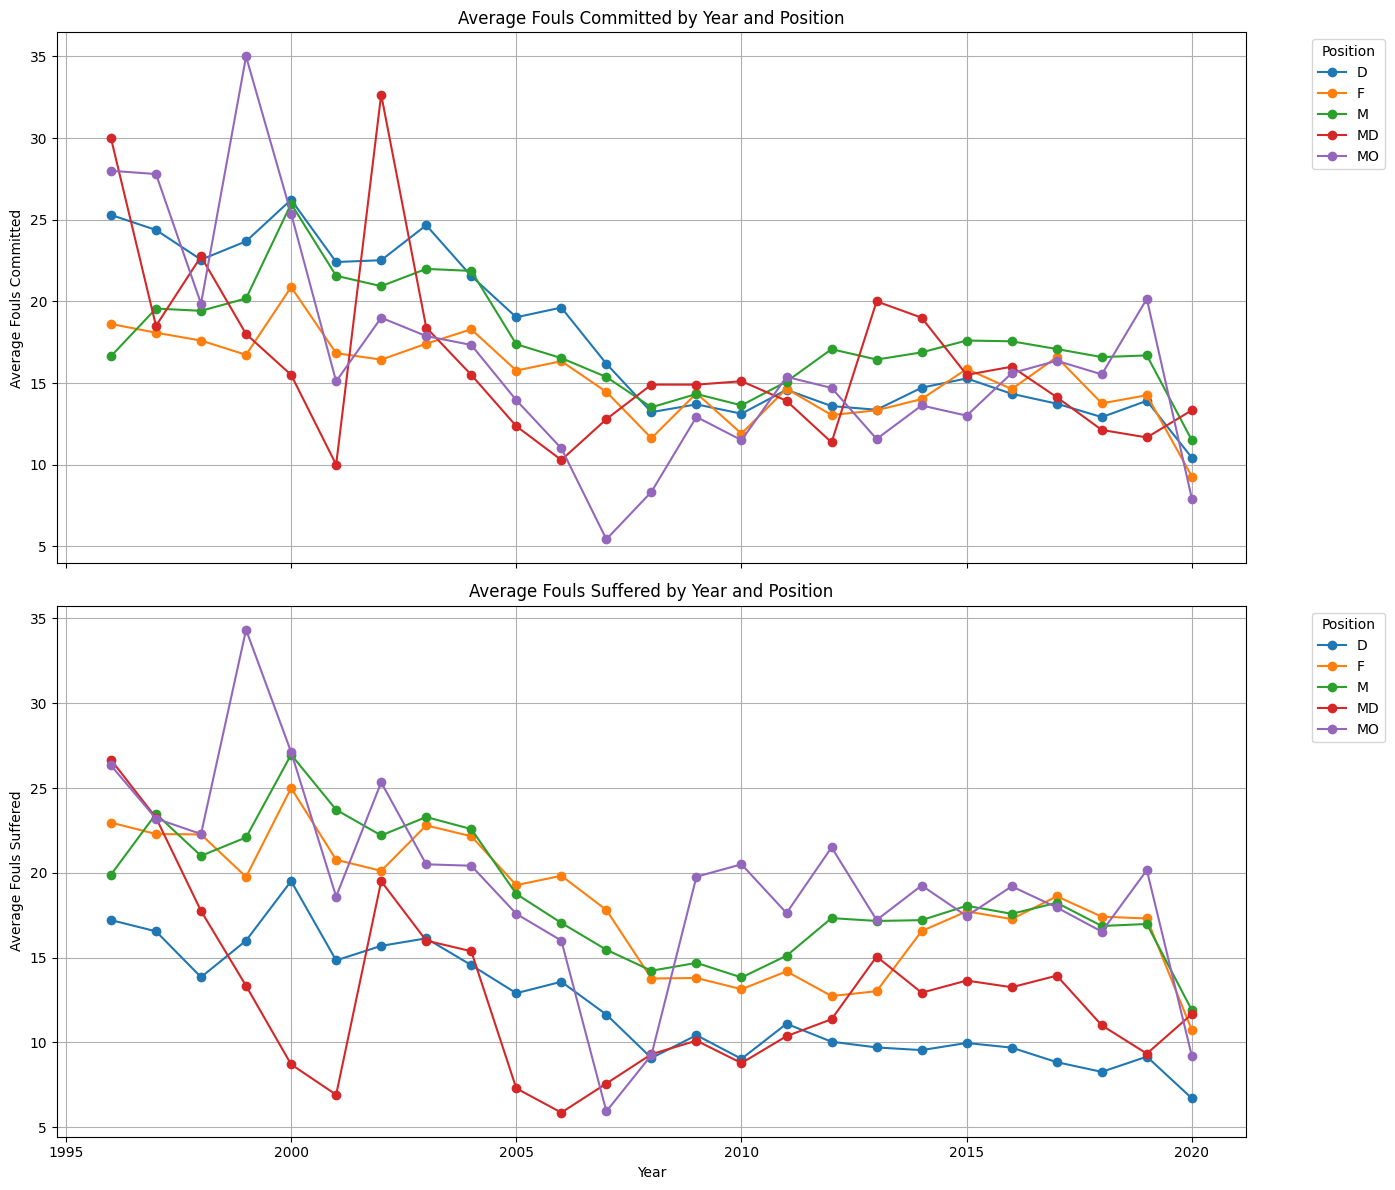

In [29]:
fouls_data = myplayers_reg.groupby(['Year', 'POS'])[['FC', 'FS']].mean().unstack('POS')

fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
    
fouls_data['FC'].plot(ax=ax[0], marker='o')
ax[0].set_title('Average Fouls Committed by Year and Position')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Fouls Committed')
ax[0].legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].grid(True)
    
fouls_data['FS'].plot(ax=ax[1], marker='o')
ax[1].set_title('Average Fouls Suffered by Year and Position')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Fouls Suffered')
ax[1].legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].grid(True)

plt.tight_layout()
plt.show()